Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1037
           1       0.84      0.84      0.84      1029

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066

ROC AUC Score: 0.9189165127409277


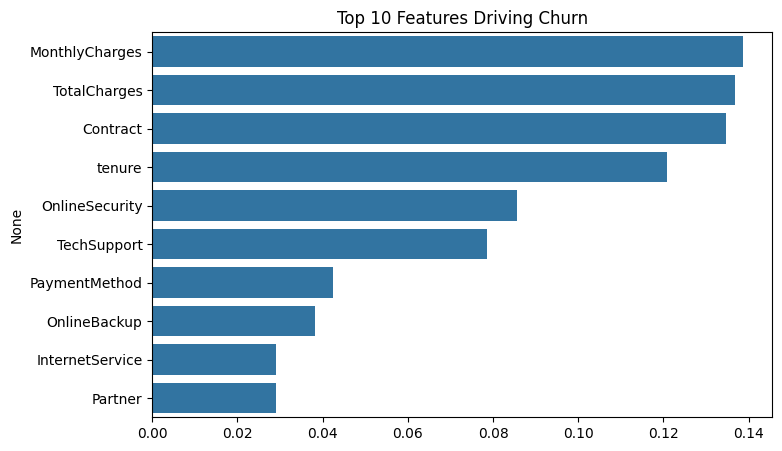

In [ ]:
# 📌 STEP 1: Install & Import Libraries
!pip install -q imbalanced-learn ipywidgets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import ipywidgets as widgets
from IPython.display import display, clear_output

# 📌 STEP 2: Load Dataset from GitHub (no upload required)
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)


# 📌 STEP 3: Data Cleaning
# Drop customerID (non-predictive)
df.drop('customerID', axis=1, inplace=True)

# Convert 'TotalCharges' to numeric (handle errors)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Encode categorical features
df_encoded = df.copy()
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# 📌 STEP 4: Define Features & Target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# 📌 STEP 5: Handle Class Imbalance using SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# 📌 STEP 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# 📌 STEP 7: Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 📌 STEP 8: Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

# 📌 STEP 9: Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=importances.values[:10], y=importances.index[:10])
plt.title("Top 10 Features Driving Churn")
plt.show()

# 📌 STEP 10: Basic Interactive Churn Risk Predictor
tenure = widgets.IntSlider(value=12, min=1, max=72, step=1, description='Tenure')
monthly = widgets.FloatSlider(value=70, min=20, max=150, step=1, description='Monthly $')
total = widgets.FloatSlider(value=1200, min=20, max=8000, step=100, description='Total $')
tech_support = widgets.ToggleButtons(options=[0, 1], description='Tech Support')
contract = widgets.ToggleButtons(options=[0, 1, 2], description='Contract')
output = widgets.Output()
predict_btn = widgets.Button(description='Predict Churn Risk', button_style='warning')

feature_template = X.columns

def predict_churn(b):
    with output:
        clear_output()
        # Dummy input array based on known column order
        input_data = np.zeros(len(feature_template))
        input_data[feature_template.get_loc('tenure')] = tenure.value
        input_data[feature_template.get_loc('MonthlyCharges')] = monthly.value
        input_data[feature_template.get_loc('TotalCharges')] = total.value
        input_data[feature_template.get_loc('TechSupport')] = tech_support.value
        input_data[feature_template.get_loc('Contract')] = contract.value

        risk_score = model.predict_proba([input_data])[0][1]
        print(f"Predicted Churn Risk: {risk_score * 100:.2f}%")

predict_btn.on_click(predict_churn)
display(widgets.VBox([tenure, monthly, total, tech_support, contract, predict_btn, output]))


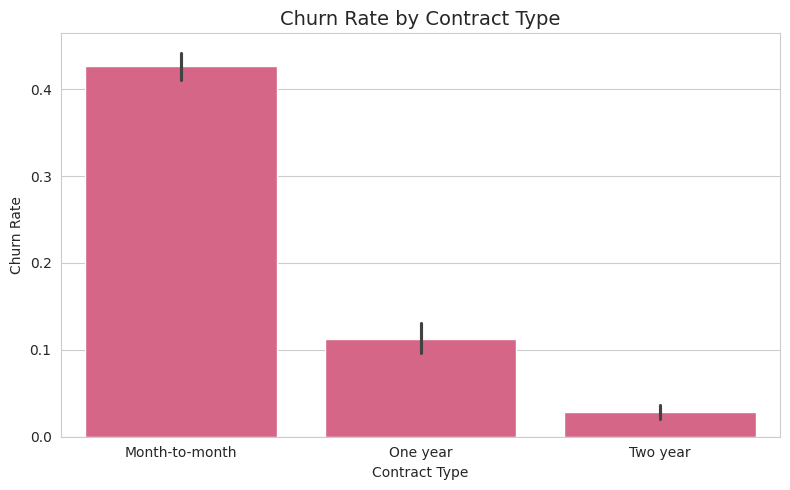

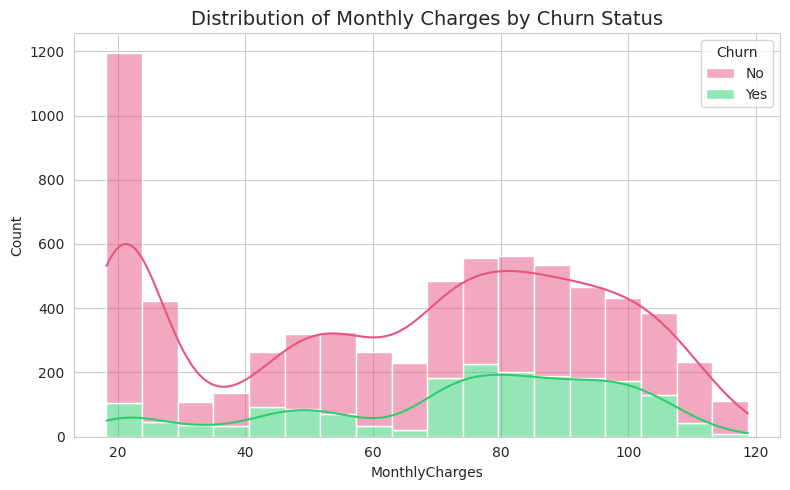

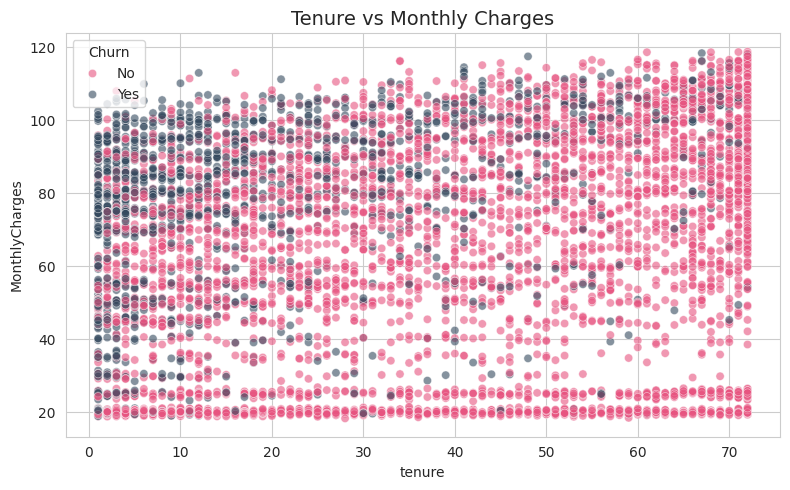

<ipython-input-4-5ac75804e9d4>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y="ChurnBinary", data=df, ax=axs[i], palette=custom_palette)
<ipython-input-4-5ac75804e9d4>:45: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(x=feature, y="ChurnBinary", data=df, ax=axs[i], palette=custom_palette)
<ipython-input-4-5ac75804e9d4>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y="ChurnBinary", data=df, ax=axs[i], palette=custom_palette)
<ipython-input-4-5ac75804e9d4>:45: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(x=feature, y="ChurnBinary", data=d

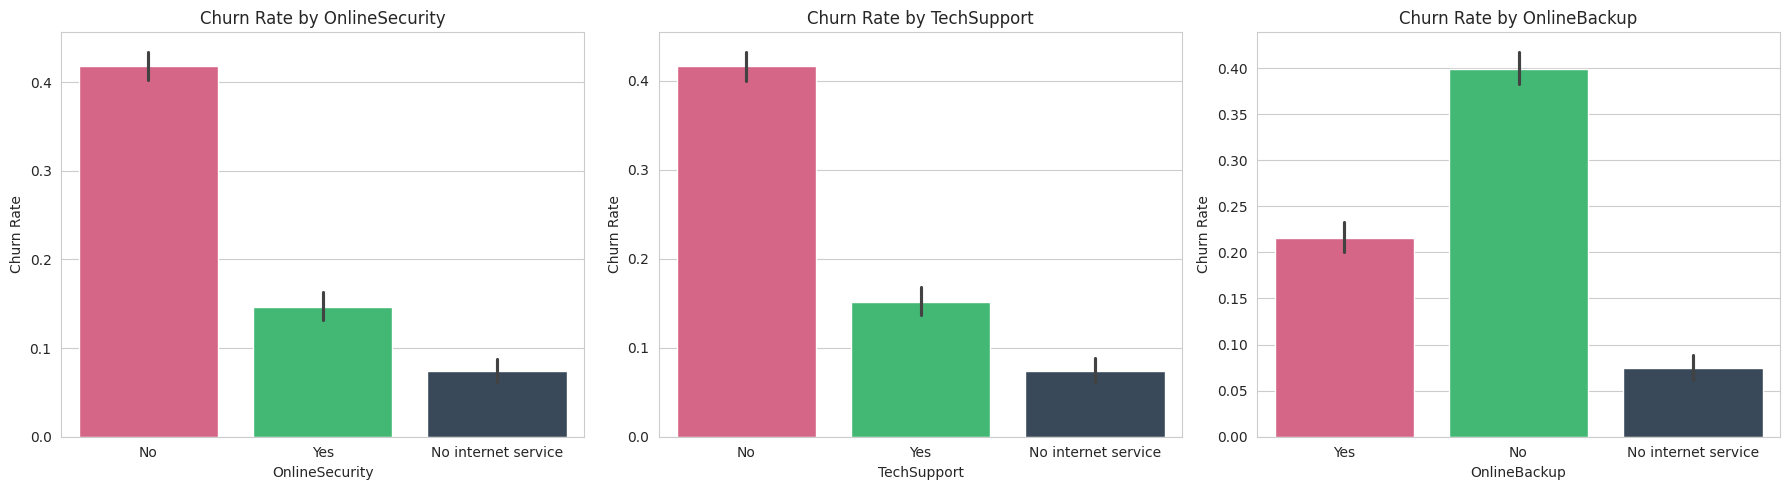

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom palette
custom_palette = ["#E75480", "#2ECC71", "#34495E", "#F4D03F"]
sns.set_palette(custom_palette)
sns.set_style("whitegrid")

# Load dataset
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)
df.columns = df.columns.str.strip()
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.dropna(subset=["TotalCharges"], inplace=True)
df["ChurnBinary"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

# Plot 1: Churn rate by contract type
plt.figure(figsize=(8, 5))
sns.barplot(x="Contract", y="ChurnBinary", data=df)
plt.title("Churn Rate by Contract Type", fontsize=14)
plt.ylabel("Churn Rate")
plt.xlabel("Contract Type")
plt.tight_layout()
plt.show()

# Plot 2: Monthly charges distribution by churn
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="MonthlyCharges", hue="Churn", kde=True, multiple="stack", palette=[custom_palette[0], custom_palette[1]])
plt.title("Distribution of Monthly Charges by Churn Status", fontsize=14)
plt.tight_layout()
plt.show()

# Plot 3: Tenure vs Monthly Charges scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="tenure", y="MonthlyCharges", hue="Churn", palette=[custom_palette[0], custom_palette[2]], alpha=0.6)
plt.title("Tenure vs Monthly Charges", fontsize=14)
plt.tight_layout()
plt.show()

# Plot 4: Churn rate by support features
support_features = ["OnlineSecurity", "TechSupport", "OnlineBackup"]
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
for i, feature in enumerate(support_features):
    sns.barplot(x=feature, y="ChurnBinary", data=df, ax=axs[i], palette=custom_palette)
    axs[i].set_title(f"Churn Rate by {feature}", fontsize=12)
    axs[i].set_ylabel("Churn Rate")
    axs[i].set_xlabel(feature)
plt.tight_layout()
plt.show()
